In [ ]:
import pandas as pd

df_accidentes = pd.read_csv('/content/AMVA_Accidentalidad_20191022_2.csv', sep=';', encoding='latin1')
df_metro = pd.read_csv('/content/Afluencia_Metro_2024.csv', sep=';', encoding='latin1')
df_encicla = pd.read_csv('EstacionesEnCicla_DatosAbiertos2_1.csv', sep=';', encoding='latin1')


In [ ]:
# Normalizar columnas
df_metro.columns = df_metro.columns.str.strip().str.lower().str.replace(' ', '_')

# Convertir columna de fecha si existe
if 'fecha' in df_metro.columns:
    df_metro['fecha'] = pd.to_datetime(df_metro['fecha'], errors='coerce')

# Filtrar valores válidos de afluencia
if 'afluencia' in df_metro.columns:
    df_metro = df_metro[df_metro['afluencia'].notna()]
    df_metro = df_metro[df_metro['afluencia'] >= 0]

# Eliminar duplicados
df_metro = df_metro.drop_duplicates()


In [ ]:
df_accidentes.columns = df_accidentes.columns.str.strip().str.lower().str.replace(' ', '_')

# Convertir fecha si hay columna apropiada
for col in ['fechahora', 'fecha', 'fecha_accidente']:
    if col in df_accidentes.columns:
        df_accidentes[col] = pd.to_datetime(df_accidentes[col], errors='coerce')

# Eliminar filas sin ubicación si aplica
if 'latitud' in df_accidentes.columns and 'longitud' in df_accidentes.columns:
    df_accidentes = df_accidentes.dropna(subset=['latitud', 'longitud'])

# Eliminar duplicados
df_accidentes = df_accidentes.drop_duplicates()


In [ ]:
df_encicla


,ï»¿#,nombre_estacion,direccion,referencia_de_ubicacion,municipio,tipo,total_anclajes,coordenadas
0,1,Moravia,CALLE 82A # 52-29,Frente a la entrada principal del Centro de De...,Zona 1 - Nororiental,MANUAL,15,"6,27658;-75,5648"
1,2,Universidad,CALLE 73 # 52-2,Bajo el viaducto de la estaciÃ³n Universidad d...,Zona 1 - Nororiental,MANUAL,33,"6,26939;-75,56577"
2,3,Ruta N,CARRERA 52 # 67A-13,Frente a la fachada principal de Ruta N sobre ...,Zona 1 - Nororiental,AUTOM.,40,"6,26518;-75,56634"
3,4,Robledo,CARRERA 77A # 63 - 100,Diagonal al Colegio Mayor de Antioquia,Zona 2 - Noroccidental,MANUAL,21,"6,27197;-75,59131"
4,5,Campus Nacional,CALLE 59A # 64C - 44,PorterÃ­a de la IguanÃ¡ con Carrera 65 de la U...,Zona 2 - Noroccidental,MANUAL,33,"6,25971;-75,579"
...,...,...,...,...,...,...,...,...
104,105,Puente pan de Queso II,CARRERA 42 - CALLE 60 SUR,Autopista sur. Salida Sur Occidente de la esta...,Itagui,AUTOM.,40,"6,1744;-75,59855"
105,106,Metro Bello,CARRERA 46 # 45B - 55,Paradero de buses del Metro. Coliseo Mancheste...,Bello,MANUAL,15,"6,33216;-75,55374"
106,107,Parque Bello,CALLE 50A # 50 - 32,Esquina Suroriental del Parque. Frente a la ca...,Bello,MANUAL,15,"6,33462;-75,5585"
107,108,ParanÃ¡,CARRERA 52D 75 AB SUR 80,Frente al conjunto residencial ParanÃ¡. A medi...,La Estrella,MANUAL,20,"6,16007;-75,62836"


In [ ]:
df_encicla.columns = df_encicla.columns.str.strip().str.lower().str.replace(' ', '_')


In [ ]:
# Asegúrate de que la columna existe
if 'coordenadas' in df_encicla.columns:
    df_encicla[['latitud', 'longitud']] = df_encicla['coordenadas'].str.extract(r'\(([^,]+),\s*([^)]+)\)')

    # Convierte a numérico
    df_encicla['latitud'] = pd.to_numeric(df_encicla['latitud'], errors='coerce')
    df_encicla['longitud'] = pd.to_numeric(df_encicla['longitud'], errors='coerce')

    # Elimina filas sin coordenadas válidas
    df_encicla = df_encicla.dropna(subset=['latitud', 'longitud'])

    # Elimina la columna original
    df_encicla = df_encicla.drop(columns='coordenadas')


In [ ]:
df_encicla = df_encicla.drop_duplicates()


In [ ]:
df_metro

,ï»¿dã­a,lã­nea_de_servicio,hora_de_operaciã³n,unnamed:_3,unnamed:_4,unnamed:_5,unnamed:_6,unnamed:_7,unnamed:_8,unnamed:_9,...,unnamed:_13,unnamed:_14,unnamed:_15,unnamed:_16,unnamed:_17,unnamed:_18,unnamed:_19,unnamed:_20,unnamed:_21,unnamed:_22
0,NaN,NaN,4:00,5:00,6:00,7:00,8:00,9:00,10:00,11:00,...,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,Total general (NÃºmero de pasajeros)
1,01.01.2024,LÃNEA 1,180,858,886,721,659,820,952,1.083,...,1.563,1.734,2.108,2.352,1.903,1.676,1.132,139,NaN,22.785
2,01.01.2024,LÃNEA 2,1,149,143,74,100,135,116,225,...,188,277,291,284,212,152,100,9,NaN,3.012
3,01.01.2024,LÃNEA A,"1.460,00","5.488,00","5.769,00","4.752,00",3.993,4.512,5.551,7.197,...,10.666,12.998,15.376,16.932,14.537,11.750,7.729,664,NaN,157.773
4,01.01.2024,LÃNEA B,"231,00","718,00","826,00","672,00",641,818,1.060,1.398,...,1.956,2.228,2.587,2.749,2.043,1.302,893,85,NaN,25.257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4290,31.12.2024,LÃNEA L,NaN,NaN,NaN,NaN,1,114,154,322,...,268,122,76,NaN,NaN,NaN,NaN,NaN,NaN,2.200
4291,31.12.2024,LÃNEA M,138,306,390,404,308,305,322,344,...,559,550,540,668,518,473,313,79,NaN,7.583
4292,31.12.2024,LÃNEA O,189,483,516,483,424,377,301,331,...,406,457,535,522,403,233,115,20,NaN,7.088
4293,31.12.2024,LÃNEA P,447,885,1.035,1.097,872,753,791,853,...,583,711,632,599,657,613,461,8,NaN,13.169


In [ ]:
import folium

mapa = folium.Map(location=[6.24, -75.57], zoom_start=12)
for _, row in df_encicla.iterrows():
    folium.Marker(location=[row['latitud'], row['longitud']],
                  popup=row['nombre_estacion']).add_to(mapa)

mapa


In [ ]:
df_accidentes

,cod_municipio,municipio,fecha,hora,día_de_la_semana,clase,dirección,gravedañossadañoss,barrio,comuna,diseño
0,79.0,BARBOSA,2015-03-01,01:00:00 PM,SABADO,CHOQUE,VIA BELLO HATILLO KM16+200,HERIDOS,EL HATILLO,SIN INFORMACIÓN,TRAMO DE VIA
1,79.0,BARBOSA,2015-07-01,03:00:00 PM,MIERCOLES,CHOQUE,HATILLO-BELLO KM 18+00,HERIDOS,PARQUE PRINCIPAL,SIN INFORMACIÓN,TRAMO DE VIA
2,79.0,BARBOSA,2015-04-01,04:01:00 AM,DOMINGO,CHOQUE,KM 16+395 METROS BARBOSA-HATILLO,HERIDOS,VIA EL HATILLO-CISNEROS,SIN INFORMACIÓN,TRAMO DE VIA
3,79.0,BARBOSA,2015-05-01,12:00:00 PM,LUNES,CHOQUE,BELLO- DON MATIAS KM 9+600,HERIDOS,EL HATILLO,SIN INFORMACIÓN,TRAMO DE VIA
4,79.0,BARBOSA,2015-11-01,01:30:00 PM,DOMINGO,CHOQUE,LOS ABUELOS,DAÑOS,PARQUE PRINCIPAL,SIN INFORMACIÓN,TRAMO DE VIA
...,...,...,...,...,...,...,...,...,...,...,...
203430,631.0,SABANETA,NaT,18:45:00,JUEVES,CHOQUE,CL 77 Sur CR 45,HERIDOS,SIN INFORMACIÓN,SIN INFORMACIÓN,SIN INFORMACIÓN
203432,631.0,SABANETA,NaT,17:00:00,VIERNES,CAIDA OCUPANTE,CL 52 Sur CR 44,HERIDOS,SIN INFORMACIÓN,SIN INFORMACIÓN,SIN INFORMACIÓN
203433,631.0,SABANETA,NaT,18:10:00,VIERNES,VOLCAMIENTO,CR 49 CL 51 Sur,HERIDOS,SIN INFORMACIÓN,SIN INFORMACIÓN,SIN INFORMACIÓN
203434,631.0,SABANETA,2018-02-08,20:15:00,JUEVES,ATROPELLO,CR 49 CL 75 Sur,MUERTOS,SIN INFORMACIÓN,SIN INFORMACIÓN,SIN INFORMACIÓN


In [ ]:
# Carga con codificación que limpia esos caracteres
df_metro = pd.read_csv('Afluencia_Metro_2024.csv', encoding='utf-8-sig', sep=';')

# Limpia columnas sin nombre o irrelevantes
df_metro = df_metro.loc[:, ~df_metro.columns.str.contains('^unnamed', case=False)]

# Renombra columnas con nombres más útiles
df_metro.columns = df_metro.columns.str.strip().str.lower().str.replace('ã¡', 'a').str.replace('ã³', 'o')\
                                     .str.replace('ã­', 'i').str.replace('ï»¿', '').str.replace(' ', '_')

# Ejemplo: convierte fecha a datetime si aplica
if 'dia' in df_metro.columns:
    df_metro['dia'] = pd.to_datetime(df_metro['dia'], errors='coerce', dayfirst=True)


In [ ]:
df_accidentes = pd.read_csv('AMVA_Accidentalidad_20191022_2.csv', encoding='latin1', sep=';')

# Limpieza de nombres
df_accidentes.columns = df_accidentes.columns.str.strip().str.lower().str.replace(' ', '_')

# Renombra la columna mal unida
df_accidentes = df_accidentes.rename(columns={'gravedañossadañoss': 'gravedad_danos'})

# Convertir columnas de fecha y hora si existen
df_accidentes['fecha'] = pd.to_datetime(df_accidentes['fecha'], errors='coerce', dayfirst=True)


In [ ]:
df_accidentes

,cod_municipio,municipio,fecha,hora,día_de_la_semana,clase,dirección,gravedad_danos,barrio,comuna,diseño
0,79.0,BARBOSA,2015-01-03,01:00:00 PM,SABADO,CHOQUE,VIA BELLO HATILLO KM16+200,HERIDOS,EL HATILLO,SIN INFORMACIÓN,TRAMO DE VIA
1,79.0,BARBOSA,2015-01-07,03:00:00 PM,MIERCOLES,CHOQUE,HATILLO-BELLO KM 18+00,HERIDOS,PARQUE PRINCIPAL,SIN INFORMACIÓN,TRAMO DE VIA
2,79.0,BARBOSA,2015-01-04,04:01:00 AM,DOMINGO,CHOQUE,KM 16+395 METROS BARBOSA-HATILLO,HERIDOS,VIA EL HATILLO-CISNEROS,SIN INFORMACIÓN,TRAMO DE VIA
3,79.0,BARBOSA,2015-01-05,12:00:00 PM,LUNES,CHOQUE,BELLO- DON MATIAS KM 9+600,HERIDOS,EL HATILLO,SIN INFORMACIÓN,TRAMO DE VIA
4,79.0,BARBOSA,2015-01-11,01:30:00 PM,DOMINGO,CHOQUE,LOS ABUELOS,DAÑOS,PARQUE PRINCIPAL,SIN INFORMACIÓN,TRAMO DE VIA
...,...,...,...,...,...,...,...,...,...,...,...
203445,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203446,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203447,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203448,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Elimina filas completamente vacías (como las del final)
df_accidentes = df_accidentes.dropna(how='all')

# Limpia columnas con strings en minúscula y sin espacios
df_accidentes.columns = df_accidentes.columns.str.strip().str.lower().str.replace(' ', '_')

# Convierte fecha y hora en un solo campo de tipo datetime
df_accidentes['fechahora'] = pd.to_datetime(df_accidentes['fecha'].astype(str) + ' ' + df_accidentes['hora'].astype(str), errors='coerce')

# Elimina filas sin fecha u hora válida
df_accidentes = df_accidentes.dropna(subset=['fechahora'])

# Verifica tipos
df_accidentes.info()


<ipython-input-23-9f99305ccad0>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_accidentes['fechahora'] = pd.to_datetime(df_accidentes['fecha'].astype(str) + ' ' + df_accidentes['hora'].astype(str), errors='coerce')


<class 'pandas.core.frame.DataFrame'>
Index: 166673 entries, 0 to 203434
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   cod_municipio     166673 non-null  float64       
 1   municipio         166673 non-null  object        
 2   fecha             166673 non-null  datetime64[ns]
 3   hora              166673 non-null  object        
 4   día_de_la_semana  166673 non-null  object        
 5   clase             166673 non-null  object        
 6   dirección         166673 non-null  object        
 7   gravedad_danos    166673 non-null  object        
 8   barrio            166623 non-null  object        
 9   comuna            166673 non-null  object        
 10  diseño            166673 non-null  object        
 11  fechahora         166673 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(9)
memory usage: 16.5+ MB


<ipython-input-23-9f99305ccad0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accidentes['fechahora'] = pd.to_datetime(df_accidentes['fecha'].astype(str) + ' ' + df_accidentes['hora'].astype(str), errors='coerce')


In [ ]:
df_accidentes.loc[:, 'fechahora'] = pd.to_datetime(
    df_accidentes['fecha'].astype(str) + ' ' + df_accidentes['hora'].astype(str), errors='coerce'
)

<ipython-input-24-107907a87baf>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_accidentes.loc[:, 'fechahora'] = pd.to_datetime(


In [ ]:
# Limpieza final (segura)
df_accidentes = df_accidentes.dropna(how='all')
df_accidentes.columns = df_accidentes.columns.str.strip().str.lower().str.replace(' ', '_')

# Fecha y hora
df_accidentes['fechahora'] = pd.to_datetime(df_accidentes['fecha'].astype(str) + ' ' + df_accidentes['hora'].astype(str), errors='coerce')
df_accidentes['año'] = df_accidentes['fechahora'].dt.year
df_accidentes['mes'] = df_accidentes['fechahora'].dt.month
df_accidentes['hora_sola'] = pd.to_datetime(df_accidentes['hora'], format='%I:%M:%S %p', errors='coerce').dt.hour


<ipython-input-26-a1649143cf74>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_accidentes['fechahora'] = pd.to_datetime(df_accidentes['fecha'].astype(str) + ' ' + df_accidentes['hora'].astype(str), errors='coerce')


In [ ]:
# Combinar fecha y hora de forma segura con formato explícito
df_accidentes['fechahora'] = pd.to_datetime(
    df_accidentes['fecha'].astype(str) + ' ' + df_accidentes['hora'].astype(str),
    format='%Y-%m-%d %I:%M:%S %p',
    errors='coerce'
)


In [ ]:
df_accidentes[['fecha', 'hora', 'fechahora']].sample(5)


,fecha,hora,fechahora
66719,2018-05-28,8:00 a. m.,NaT
105063,2017-11-22,9:12:00 a. m.,NaT
188329,2015-11-10,9:30:00,NaT
115337,2016-02-22,3:00:00 p. m.,NaT
127354,2016-06-04,8:35:00 a. m.,NaT


In [ ]:
import re

# Normalizar hora: reemplazar "a. m." y "p. m." por "AM"/"PM"
df_accidentes['hora_limpia'] = df_accidentes['hora'].str.lower()
df_accidentes['hora_limpia'] = df_accidentes['hora_limpia'].str.replace(r'\s*a\.?\s*m\.?', 'AM', regex=True)
df_accidentes['hora_limpia'] = df_accidentes['hora_limpia'].str.replace(r'\s*p\.?\s*m\.?', 'PM', regex=True)

# Si falta el formato de segundos, agregarlos como ":00"
df_accidentes['hora_limpia'] = df_accidentes['hora_limpia'].apply(lambda x: x if re.search(r':\d{2}:\d{2}', x) else x.replace(':', ':00:'))

# Unir fecha y hora ya limpias
df_accidentes['fechahora'] = pd.to_datetime(
    df_accidentes['fecha'].astype(str) + ' ' + df_accidentes['hora_limpia'],
    format='%Y-%m-%d %I:%M:%S %p',
    errors='coerce'
)


In [ ]:
df_accidentes[['fecha', 'hora', 'hora_limpia', 'fechahora']].sample(5)


,fecha,hora,hora_limpia,fechahora
151275,2016-12-20,8:20:00 p. m.,8:20:00PM,NaT
89604,2017-07-17,6:40:00 a. m.,6:40:00AM,NaT
110265,2016-01-08,7:00:00 p. m.,7:00:00PM,NaT
141984,2016-10-04,2:00:00 p. m.,2:00:00PM,NaT
170104,2015-06-16,14:00:00,14:00:00,NaT


In [ ]:
from dateutil import parser

def parse_fecha_hora(row):
    try:
        return parser.parse(f"{row['fecha']} {row['hora']}", dayfirst=False)
    except Exception:
        return pd.NaT

# Aplicar función fila por fila
df_accidentes['fechahora'] = df_accidentes.apply(parse_fecha_hora, axis=1)


In [ ]:
df_accidentes['fechahora'].isna().mean()  # Porcentaje de fechas no convertidas
df_accidentes[['fecha', 'hora', 'fechahora']].sample(5)


,fecha,hora,fechahora
192650,2015-12-09,4:25:00,2015-12-09 04:25:00
165711,2015-05-24,10:00:00,2015-05-24 10:00:00
2390,2016-06-05,03:30:00 PM,2016-06-05 15:30:00
198116,2017-01-30,6:30:00,2017-01-30 06:30:00
132781,2016-07-22,1:09:00 p. m.,2016-07-22 13:09:00


In [ ]:
# Agrupamos por año y mes, sumando el total de accidentes por mes
acc_por_año_mes = df_accidentes.groupby(['año', 'mes']).size().reset_index(name='total_accidentes')

# Convertimos el año y mes a un formato de fecha, asignando el día 1 para cada mes
acc_por_año_mes['fecha_mes'] = pd.to_datetime(acc_por_año_mes['año'].astype(str) + '-' + acc_por_año_mes['mes'].astype(str) + '-01')

# Ver los primeros registros para comprobar
acc_por_año_mes.head()


,año,mes,total_accidentes,fecha_mes
0,2015,1,3106,2015-01-01
1,2015,2,3432,2015-02-01
2,2015,3,3764,2015-03-01
3,2015,4,3539,2015-04-01
4,2015,5,3820,2015-05-01


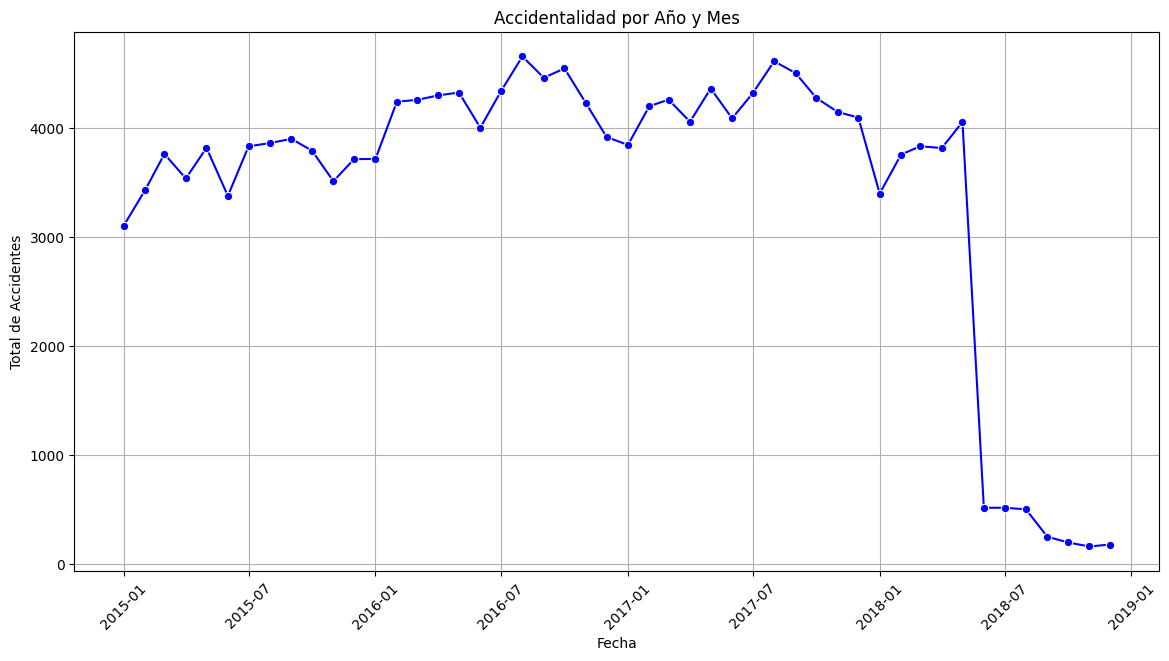

In [ ]:
plt.figure(figsize=(14,7))
sns.lineplot(data=acc_por_año_mes, x='fecha_mes', y='total_accidentes', marker='o', color='b')

plt.title('Accidentalidad por Año y Mes')
plt.xlabel('Fecha')
plt.ylabel('Total de Accidentes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
# Verificar si hay fechas faltantes en la columna 'fechahora'
df_accidentes[df_accidentes['fechahora'].isna()]


,cod_municipio,municipio,fecha,hora,día_de_la_semana,clase,dirección,gravedad_danos,barrio,comuna,diseño,fechahora,hora_sola,año,mes,hora_limpia


In [ ]:
# Verificar las fechas en el rango de 2018
df_accidentes_2018 = df_accidentes[df_accidentes['año'] == 2018]
df_accidentes_2018['fecha'].describe()


,fecha
count,21187
mean,2018-04-03 16:55:53.452588800
min,2018-01-01 00:00:00
25%,2018-02-14 00:00:00
50%,2018-03-27 00:00:00
75%,2018-05-08 00:00:00
max,2018-12-31 00:00:00


In [ ]:
# Ver accidentes por mes en 2018
acc_2018_por_mes = df_accidentes_2018.groupby('mes').size().reset_index(name='total_accidentes')
acc_2018_por_mes


,mes,total_accidentes
0,1,3400
1,2,3759
2,3,3835
3,4,3818
4,5,4058
5,6,515
6,7,516
7,8,501
8,9,250
9,10,197


In [ ]:
# Filtrar los accidentes ocurridos en Medellín en 2018
df_medellin_2018 = df_accidentes[(df_accidentes['municipio'] == 'MEDELLÍN') & (df_accidentes['año'] == 2018)]

# Agrupar por tipo de accidente y contar la cantidad de accidentes
accidentes_tipo_2018 = df_medellin_2018.groupby('clase').size().reset_index(name='total_accidentes')

# Mostrar los resultados
accidentes_tipo_2018


,clase,total_accidentes
0,ATROPELLO,1418
1,CAIDA OCUPANTE,1599
2,CHOQUE,11310
3,INCENDIO,2
4,OTRO,1585
5,VOLCAMIENTO,457


In [ ]:
df_accidentes

,cod_municipio,municipio,fecha,hora,día_de_la_semana,clase,dirección,gravedad_danos,barrio,comuna,diseño,fechahora,hora_sola,año,mes,hora_limpia
0,79.0,BARBOSA,2015-01-03,01:00:00 PM,SABADO,CHOQUE,VIA BELLO HATILLO KM16+200,HERIDOS,EL HATILLO,SIN INFORMACIÓN,TRAMO DE VIA,2015-01-03 13:00:00,13.0,2015,1,01:00:00PM
1,79.0,BARBOSA,2015-01-07,03:00:00 PM,MIERCOLES,CHOQUE,HATILLO-BELLO KM 18+00,HERIDOS,PARQUE PRINCIPAL,SIN INFORMACIÓN,TRAMO DE VIA,2015-01-07 15:00:00,15.0,2015,1,03:00:00PM
2,79.0,BARBOSA,2015-01-04,04:01:00 AM,DOMINGO,CHOQUE,KM 16+395 METROS BARBOSA-HATILLO,HERIDOS,VIA EL HATILLO-CISNEROS,SIN INFORMACIÓN,TRAMO DE VIA,2015-01-04 04:01:00,4.0,2015,1,04:01:00AM
3,79.0,BARBOSA,2015-01-05,12:00:00 PM,LUNES,CHOQUE,BELLO- DON MATIAS KM 9+600,HERIDOS,EL HATILLO,SIN INFORMACIÓN,TRAMO DE VIA,2015-01-05 12:00:00,12.0,2015,1,12:00:00PM
4,79.0,BARBOSA,2015-01-11,01:30:00 PM,DOMINGO,CHOQUE,LOS ABUELOS,DAÑOS,PARQUE PRINCIPAL,SIN INFORMACIÓN,TRAMO DE VIA,2015-01-11 13:30:00,13.0,2015,1,01:30:00PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203430,631.0,SABANETA,2018-08-30,18:45:00,JUEVES,CHOQUE,CL 77 Sur CR 45,HERIDOS,SIN INFORMACIÓN,SIN INFORMACIÓN,SIN INFORMACIÓN,2018-08-30 18:45:00,NaN,2018,8,18:45:00
203431,631.0,SABANETA,2018-08-30,18:45:00,JUEVES,CHOQUE,CL 77 Sur CR 45,HERIDOS,SIN INFORMACIÓN,SIN INFORMACIÓN,SIN INFORMACIÓN,2018-08-30 18:45:00,NaN,2018,8,18:45:00
203432,631.0,SABANETA,2018-08-31,17:00:00,VIERNES,CAIDA OCUPANTE,CL 52 Sur CR 44,HERIDOS,SIN INFORMACIÓN,SIN INFORMACIÓN,SIN INFORMACIÓN,2018-08-31 17:00:00,NaN,2018,8,17:00:00
203433,631.0,SABANETA,2018-08-31,18:10:00,VIERNES,VOLCAMIENTO,CR 49 CL 51 Sur,HERIDOS,SIN INFORMACIÓN,SIN INFORMACIÓN,SIN INFORMACIÓN,2018-08-31 18:10:00,NaN,2018,8,18:10:00


In [ ]:
# Filtrar los datos solo para Medellín
df_medellin = df_accidentes[df_accidentes['municipio'] == 'MEDELLÍN']

# Verificar las primeras filas del dataset filtrado
df_medellin.head()


,cod_municipio,municipio,fecha,hora,día_de_la_semana,clase,dirección,gravedad_danos,barrio,comuna,diseño,fechahora,hora_sola,año,mes,hora_limpia
50710,1.0,MEDELLÍN,2018-01-01,12:20 a. m.,LUNES,OTRO,CL 58 CR 25,HERIDOS,LOS MANGOS,VILLA HERMOSA,LOTE O PREDIO,2018-01-01 00:20:00,NaN,2018,1,12:00:20AM
50711,1.0,MEDELLÍN,2018-01-01,12:20 a. m.,LUNES,CHOQUE,CR 50 B CL 81 A,HERIDOS,BRASILIA,ARANJUEZ,INTERSECCION,2018-01-01 00:20:00,NaN,2018,1,12:00:20AM
50712,1.0,MEDELLÍN,2018-01-01,6:45 a. m.,LUNES,CHOQUE,CR 65 CL 10,HERIDOS,CAMPO AMOR,GUAYABAL,GLORIETA,2018-01-01 06:45:00,NaN,2018,1,6:00:45AM
50713,1.0,MEDELLÍN,2018-01-01,1:00 p. m.,LUNES,CHOQUE,CR 89 A CL 76,HERIDOS,AURES NO.1,ROBLEDO,TRAMO DE VIA,2018-01-01 13:00:00,NaN,2018,1,1:00:00PM
50714,1.0,MEDELLÍN,2018-01-01,1:30 p. m.,LUNES,CHOQUE,CR 45 A CL 96,HERIDOS,VILLA GUADALUPE,POPULAR,TRAMO DE VIA,2018-01-01 13:30:00,NaN,2018,1,1:00:30PM


<ipython-input-47-52ef74e106ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medellin['fecha'] = pd.to_datetime(df_medellin['fecha'])
<ipython-input-47-52ef74e106ad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medellin['año'] = df_medellin['fecha'].dt.year
<ipython-input-47-52ef74e106ad>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

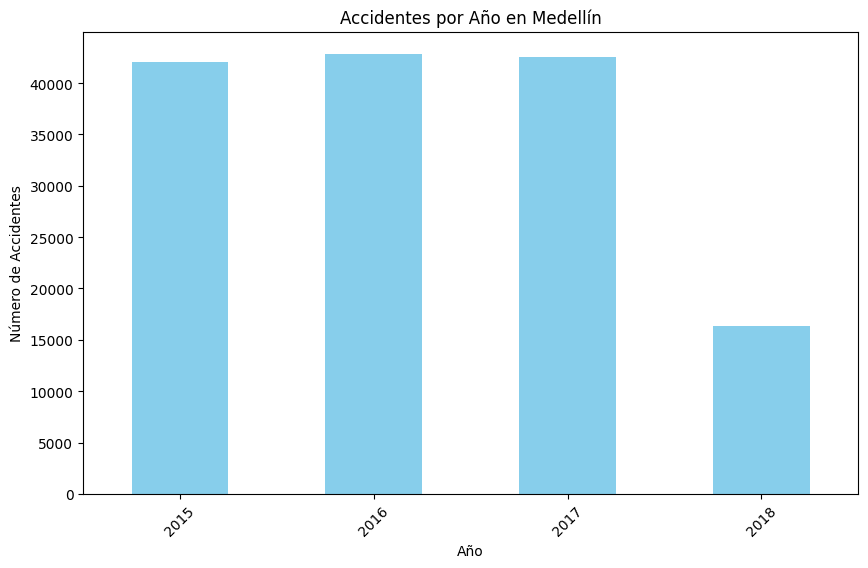

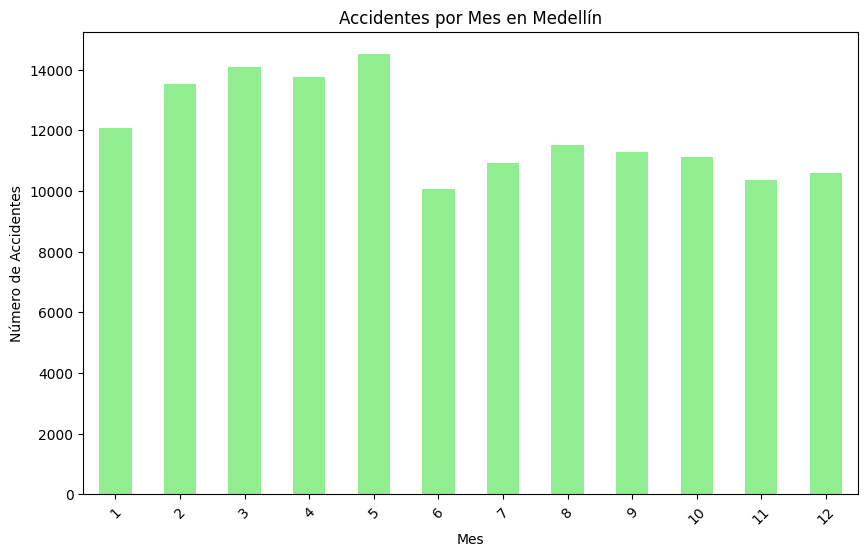

In [ ]:
# Convertimos la columna 'fecha' a tipo datetime si no lo está
df_medellin['fecha'] = pd.to_datetime(df_medellin['fecha'])

# Extraemos el año, mes y día de la semana
df_medellin['año'] = df_medellin['fecha'].dt.year
df_medellin['mes'] = df_medellin['fecha'].dt.month
df_medellin['día_de_la_semana'] = df_medellin['fecha'].dt.day_name()

# Contamos los accidentes por año y mes
accidentes_por_año = df_medellin.groupby('año').size()
accidentes_por_mes = df_medellin.groupby('mes').size()

# Visualizamos los accidentes por año y mes
import matplotlib.pyplot as plt

# Accidentes por Año
plt.figure(figsize=(10, 6))
accidentes_por_año.plot(kind='bar', color='skyblue')
plt.title('Accidentes por Año en Medellín')
plt.xlabel('Año')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)
plt.show()

# Accidentes por Mes
plt.figure(figsize=(10, 6))
accidentes_por_mes.plot(kind='bar', color='lightgreen')
plt.title('Accidentes por Mes en Medellín')
plt.xlabel('Mes')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Limpiar la columna 'hora' eliminando el sufijo 'a. m.' o 'p. m.'
df_accidentes['hora_limpia'] = df_accidentes['hora'].str.replace(r'\s[aA|pP]\.?\s?[mM]\.?$', '', regex=True)

# Convertir 'hora_limpia' al formato de hora de 24 horas
df_accidentes['hora_limpia'] = pd.to_datetime(df_accidentes['hora_limpia'], format='%I:%M:%S %p', errors='coerce')

# Crear la columna 'fechahora' combinando 'fecha' y 'hora_limpia'
df_accidentes['fechahora'] = pd.to_datetime(df_accidentes['fecha'].astype(str) + ' ' + df_accidentes['hora_limpia'].astype(str), errors='coerce')

# Verificar las primeras filas para asegurarnos de que la conversión ha funcionado correctamente
df_accidentes.head()


<ipython-input-50-f2240da4a9c7>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_accidentes['fechahora'] = pd.to_datetime(df_accidentes['fecha'].astype(str) + ' ' + df_accidentes['hora_limpia'].astype(str), errors='coerce')


,cod_municipio,municipio,fecha,hora,día_de_la_semana,clase,dirección,gravedad_danos,barrio,comuna,diseño,fechahora,hora_sola,año,mes,hora_limpia
0,79.0,BARBOSA,2015-01-03,01:00:00 PM,SABADO,CHOQUE,VIA BELLO HATILLO KM16+200,HERIDOS,EL HATILLO,SIN INFORMACIÓN,TRAMO DE VIA,NaT,13.0,2015,1,NaT
1,79.0,BARBOSA,2015-01-07,03:00:00 PM,MIERCOLES,CHOQUE,HATILLO-BELLO KM 18+00,HERIDOS,PARQUE PRINCIPAL,SIN INFORMACIÓN,TRAMO DE VIA,NaT,15.0,2015,1,NaT
2,79.0,BARBOSA,2015-01-04,04:01:00 AM,DOMINGO,CHOQUE,KM 16+395 METROS BARBOSA-HATILLO,HERIDOS,VIA EL HATILLO-CISNEROS,SIN INFORMACIÓN,TRAMO DE VIA,NaT,4.0,2015,1,NaT
3,79.0,BARBOSA,2015-01-05,12:00:00 PM,LUNES,CHOQUE,BELLO- DON MATIAS KM 9+600,HERIDOS,EL HATILLO,SIN INFORMACIÓN,TRAMO DE VIA,NaT,12.0,2015,1,NaT
4,79.0,BARBOSA,2015-01-11,01:30:00 PM,DOMINGO,CHOQUE,LOS ABUELOS,DAÑOS,PARQUE PRINCIPAL,SIN INFORMACIÓN,TRAMO DE VIA,NaT,13.0,2015,1,NaT


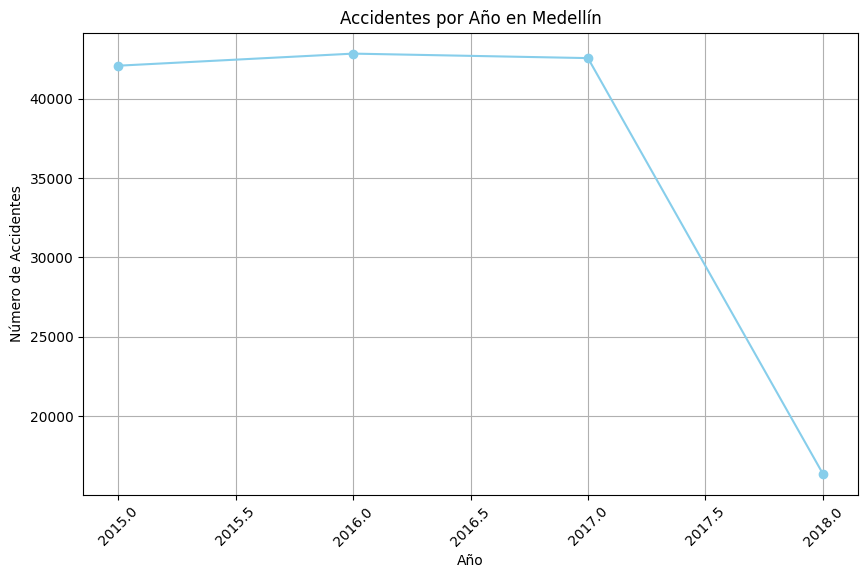

In [ ]:
# Accidentes por Año con gráfica de líneas
plt.figure(figsize=(10, 6))
accidentes_por_año.plot(kind='line', color='skyblue', marker='o')
plt.title('Accidentes por Año en Medellín')
plt.xlabel('Año')
plt.ylabel('Número de Accidentes')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


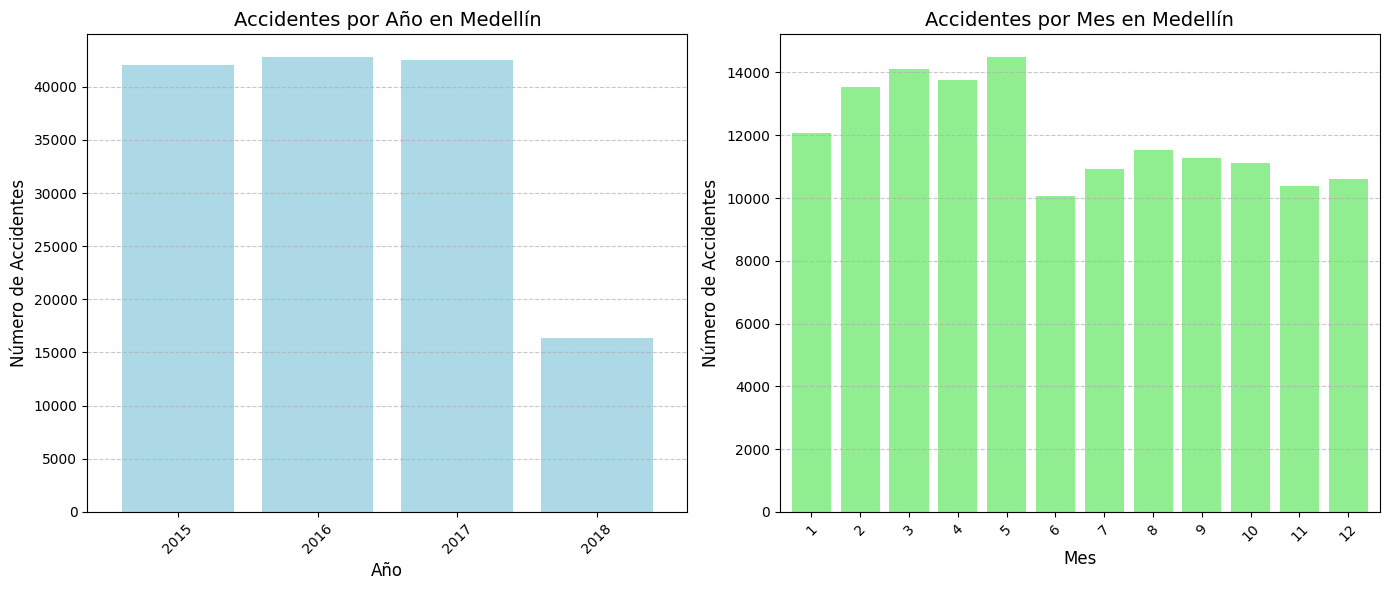

In [ ]:
import matplotlib.pyplot as plt

# Crear una figura con 2 subgráficas (uno para los accidentes por año y otro por mes)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de barras para Accidentes por Año
accidentes_por_año.plot(kind='bar', ax=axes[0], color='lightblue', width=0.8)
axes[0].set_title('Accidentes por Año en Medellín', fontsize=14)
axes[0].set_xlabel('Año', fontsize=12)
axes[0].set_ylabel('Número de Accidentes', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, axis='y', linestyle='--', alpha=0.7)

# Gráfico de barras para Accidentes por Mes
accidentes_por_mes.plot(kind='bar', ax=axes[1], color='lightgreen', width=0.8)
axes[1].set_title('Accidentes por Mes en Medellín', fontsize=14)
axes[1].set_xlabel('Mes', fontsize=12)
axes[1].set_ylabel('Número de Accidentes', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, axis='y', linestyle='--', alpha=0.7)

# Ajustar el espaciado entre las gráficas
plt.tight_layout()

# Mostrar la imagen
plt.show()


In [ ]:
# Filtrar los datos para el año 2018
df_accidentes_2018 = df_accidentes[df_accidentes['fecha'].dt.year == 2018]

# Ver los meses únicos en 2018
meses_2018 = df_accidentes_2018['fecha'].dt.month.unique()
print(meses_2018)


[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [ ]:
df_metro = pd.read_csv('Afluencia_Metro_2024.csv', encoding='utf-8-sig', sep=';')

In [ ]:
df_metro

,Día,Línea de Servicio,Hora de operación,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,4:00,5:00,6:00,7:00,8:00,9:00,10:00,11:00,...,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,Total general (Número de pasajeros)
1,01.01.2024,LÍNEA 1,180,858,886,721,659,820,952,1.083,...,1.563,1.734,2.108,2.352,1.903,1.676,1.132,139,NaN,22.785
2,01.01.2024,LÍNEA 2,1,149,143,74,100,135,116,225,...,188,277,291,284,212,152,100,9,NaN,3.012
3,01.01.2024,LÍNEA A,"1.460,00","5.488,00","5.769,00","4.752,00",3.993,4.512,5.551,7.197,...,10.666,12.998,15.376,16.932,14.537,11.750,7.729,664,NaN,157.773
4,01.01.2024,LÍNEA B,"231,00","718,00","826,00","672,00",641,818,1.060,1.398,...,1.956,2.228,2.587,2.749,2.043,1.302,893,85,NaN,25.257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4290,31.12.2024,LÍNEA L,NaN,NaN,NaN,NaN,1,114,154,322,...,268,122,76,NaN,NaN,NaN,NaN,NaN,NaN,2.200
4291,31.12.2024,LÍNEA M,138,306,390,404,308,305,322,344,...,559,550,540,668,518,473,313,79,NaN,7.583
4292,31.12.2024,LÍNEA O,189,483,516,483,424,377,301,331,...,406,457,535,522,403,233,115,20,NaN,7.088
4293,31.12.2024,LÍNEA P,447,885,1.035,1.097,872,753,791,853,...,583,711,632,599,657,613,461,8,NaN,13.169


In [ ]:
# Eliminar la primera fila (índice 0), que parece estar mal ubicada
df_metro = df_metro.drop(index=0).reset_index(drop=True)

# Asignar nombres claros a las columnas
nuevos_nombres = ['Día', 'Línea de Servicio']
horas = [f'Hora_{str(h).zfill(2)}:00' for h in range(4, 24)]  # De 04:00 a 23:00
nuevos_nombres += horas
nuevos_nombres.append('Total_Pasajeros')

# Verifica que el número de columnas coincida con la lista de nombres
assert len(df_metro.columns) == len(nuevos_nombres), "Revisa: número de columnas no coincide"

# Renombrar columnas
df_metro.columns = nuevos_nombres

# Mostrar una muestra del dataframe limpio
print(df_metro.head())

          Día Línea de Servicio Hora_04:00 Hora_05:00 Hora_06:00 Hora_07:00  \
0  01.01.2024           LÍNEA 2          1        149        143         74   
1  01.01.2024           LÍNEA A   1.460,00   5.488,00   5.769,00   4.752,00   
2  01.01.2024           LÍNEA B     231,00     718,00     826,00     672,00   
3  01.01.2024           LÍNEA H        NaN        NaN        NaN        NaN   
4  01.01.2024           LÍNEA J        NaN        NaN        NaN        NaN   

  Hora_08:00 Hora_09:00 Hora_10:00 Hora_11:00  ... Hora_15:00 Hora_16:00  \
0        100        135        116        225  ...        188        277   
1      3.993      4.512      5.551      7.197  ...     10.666     12.998   
2        641        818      1.060      1.398  ...      1.956      2.228   
3        NaN         50         62         71  ...         72         93   
4         39        368        401        381  ...        551        619   

  Hora_17:00 Hora_18:00 Hora_19:00 Hora_20:00 Hora_21:00 Hora_22:00 

In [ ]:
df_metro

,Día,Línea de Servicio,Hora_04:00,Hora_05:00,Hora_06:00,Hora_07:00,Hora_08:00,Hora_09:00,Hora_10:00,Hora_11:00,...,Hora_15:00,Hora_16:00,Hora_17:00,Hora_18:00,Hora_19:00,Hora_20:00,Hora_21:00,Hora_22:00,Hora_23:00,Total_Pasajeros
0,01.01.2024,LÍNEA 2,1,149,143,74,100,135,116,225,...,188,277,291,284,212,152,100,9,NaN,3.012
1,01.01.2024,LÍNEA A,"1.460,00","5.488,00","5.769,00","4.752,00",3.993,4.512,5.551,7.197,...,10.666,12.998,15.376,16.932,14.537,11.750,7.729,664,NaN,157.773
2,01.01.2024,LÍNEA B,"231,00","718,00","826,00","672,00",641,818,1.060,1.398,...,1.956,2.228,2.587,2.749,2.043,1.302,893,85,NaN,25.257
3,01.01.2024,LÍNEA H,NaN,NaN,NaN,NaN,NaN,50,62,71,...,72,93,83,"113,00","80,00","39,00","25,00","4,00",NaN,899
4,01.01.2024,LÍNEA J,NaN,NaN,NaN,NaN,39,368,401,381,...,551,619,726,906,542,356,140,3,NaN,6.529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4288,31.12.2024,LÍNEA L,NaN,NaN,NaN,NaN,1,114,154,322,...,268,122,76,NaN,NaN,NaN,NaN,NaN,NaN,2.200
4289,31.12.2024,LÍNEA M,138,306,390,404,308,305,322,344,...,559,550,540,668,518,473,313,79,NaN,7.583
4290,31.12.2024,LÍNEA O,189,483,516,483,424,377,301,331,...,406,457,535,522,403,233,115,20,NaN,7.088
4291,31.12.2024,LÍNEA P,447,885,1.035,1.097,872,753,791,853,...,583,711,632,599,657,613,461,8,NaN,13.169


In [ ]:
# Reemplazar punto como separador de miles y coma como decimal, luego convertir a float
columnas_horas = [col for col in df_metro.columns if 'Hora_' in col or col == 'Total_Pasajeros']

for col in columnas_horas:
    df_metro[col] = (
        df_metro[col]
        .astype(str)
        .str.replace('.', '', regex=False)  # Quita puntos separadores de miles
        .str.replace(',', '.', regex=False)  # Convierte comas a puntos decimales
        .str.replace('nan', '', regex=False)  # Limpia NaNs mal convertidos a string
    )
    df_metro[col] = pd.to_numeric(df_metro[col], errors='coerce')  # Convierte a float, NaN si hay error

# Revisión rápida
print(df_metro[columnas_horas].dtypes)
print(df_metro.head())


Hora_04:00         float64
Hora_05:00         float64
Hora_06:00         float64
Hora_07:00         float64
Hora_08:00         float64
Hora_09:00         float64
Hora_10:00         float64
Hora_11:00         float64
Hora_12:00         float64
Hora_13:00         float64
Hora_14:00         float64
Hora_15:00         float64
Hora_16:00         float64
Hora_17:00         float64
Hora_18:00         float64
Hora_19:00         float64
Hora_20:00         float64
Hora_21:00         float64
Hora_22:00         float64
Hora_23:00         float64
Total_Pasajeros      int64
dtype: object
          Día Línea de Servicio  Hora_04:00  Hora_05:00  Hora_06:00  \
0  01.01.2024           LÍNEA 2         1.0       149.0       143.0   
1  01.01.2024           LÍNEA A      1460.0      5488.0      5769.0   
2  01.01.2024           LÍNEA B       231.0       718.0       826.0   
3  01.01.2024           LÍNEA H         NaN         NaN         NaN   
4  01.01.2024           LÍNEA J         NaN         NaN         

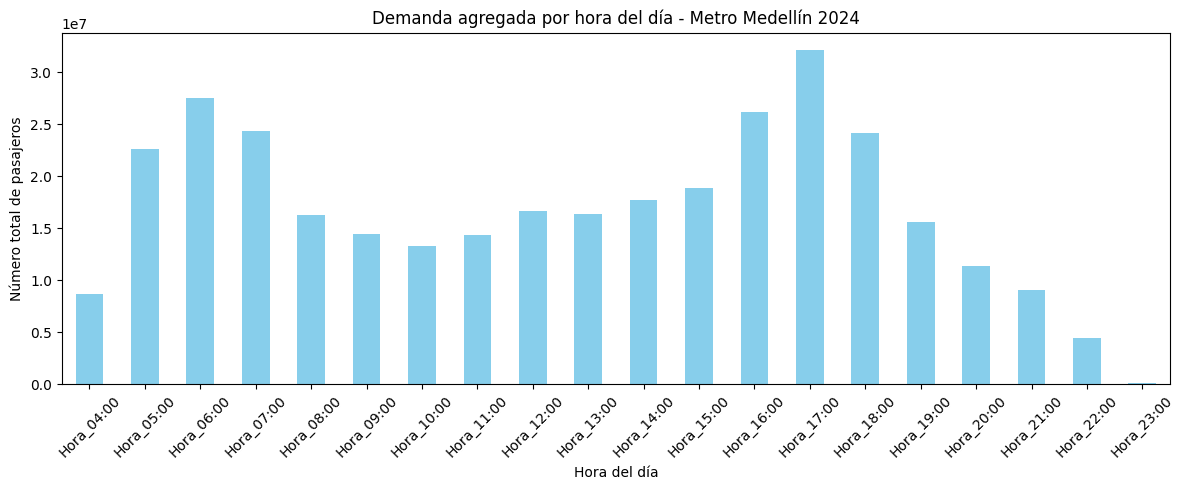

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Aseguramos que los datos estén en formato numérico
columnas_horas = [col for col in df_metro.columns if col.startswith("Hora_")]
df_metro[columnas_horas] = df_metro[columnas_horas].replace(",", "", regex=True).apply(pd.to_numeric, errors='coerce')

# Sumar pasajeros por hora en todo el dataset
demanda_horaria = df_metro[columnas_horas].sum()

# Visualización
plt.figure(figsize=(12, 5))
demanda_horaria.plot(kind='bar', color='skyblue')
plt.title("Demanda agregada por hora del día - Metro Medellín 2024")
plt.xlabel("Hora del día")
plt.ylabel("Número total de pasajeros")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


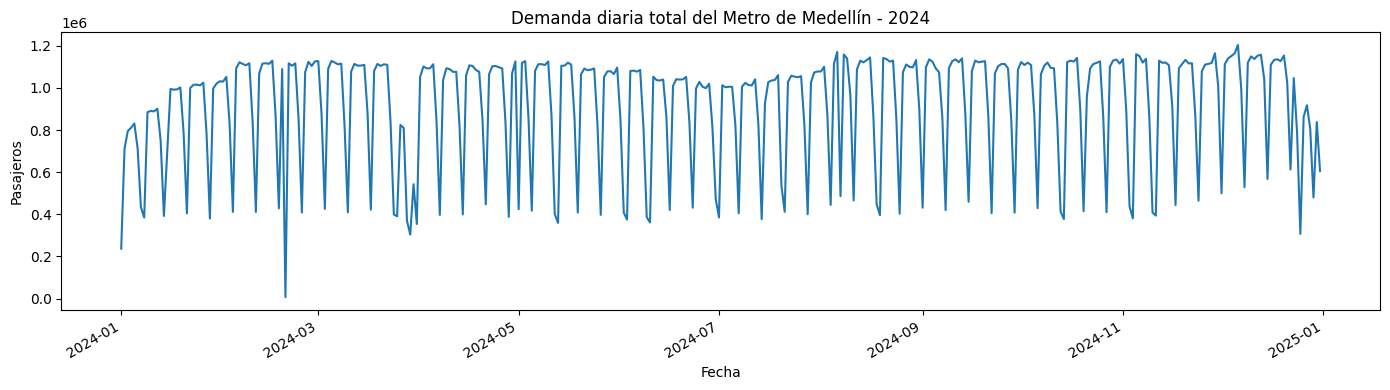

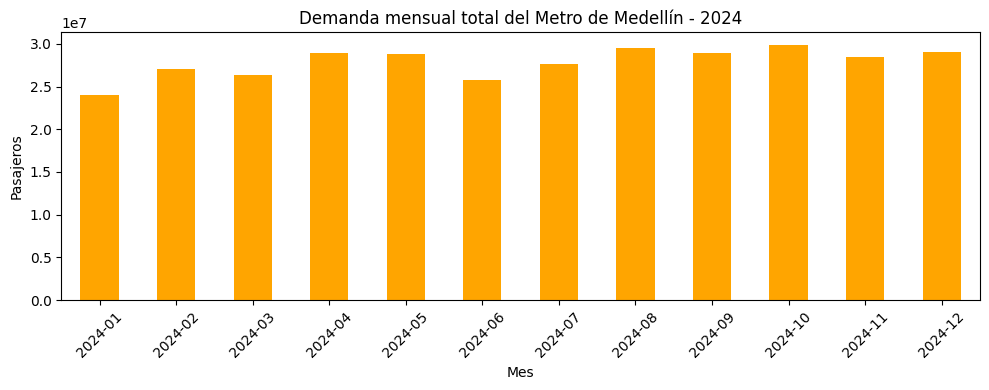

In [ ]:
# Formatear columna de fecha
df_metro['Día'] = pd.to_datetime(df_metro['Día'], dayfirst=True)
df_metro['Total_Pasajeros'] = df_metro['Total_Pasajeros'].replace(",", "", regex=True).astype(float)

# Agrupar por día
serie_diaria = df_metro.groupby('Día')['Total_Pasajeros'].sum()

# Agrupar por mes
serie_mensual = df_metro.groupby(df_metro['Día'].dt.to_period('M'))['Total_Pasajeros'].sum()

# Gráfico diario
plt.figure(figsize=(14, 4))
serie_diaria.plot()
plt.title("Demanda diaria total del Metro de Medellín - 2024")
plt.xlabel("Fecha")
plt.ylabel("Pasajeros")
plt.tight_layout()
plt.show()

# Gráfico mensual
plt.figure(figsize=(10, 4))
serie_mensual.plot(kind='bar', color='orange')
plt.title("Demanda mensual total del Metro de Medellín - 2024")
plt.xlabel("Mes")
plt.ylabel("Pasajeros")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


                   Hora_04:00  Hora_05:00  Hora_06:00  Hora_07:00  Hora_08:00  \
Línea de Servicio                                                               
LÍNEA 1              852364.0   2344316.0   2940343.0   2750171.0   1860743.0   
LÍNEA 2               54534.0    252137.0    299346.0    318272.0    264598.0   
LÍNEA A             4879199.0  13531449.0  17417701.0  15185403.0   9960899.0   
LÍNEA B              903272.0   2222930.0   2523526.0   2307336.0   1600789.0   
LÍNEA H               60898.0    158944.0    123763.0     78557.0     50514.0   
LÍNEA J              385732.0    669919.0    640750.0    563942.0    381103.0   
LÍNEA K              601642.0    734316.0    697485.0    586388.0    488917.0   
LÍNEA L                   0.0         0.0         1.0         3.0      5967.0   
LÍNEA M              105880.0    259580.0    251342.0    181612.0    120402.0   
LÍNEA O               76306.0    390240.0    454291.0    490554.0    297044.0   
LÍNEA P              362717.

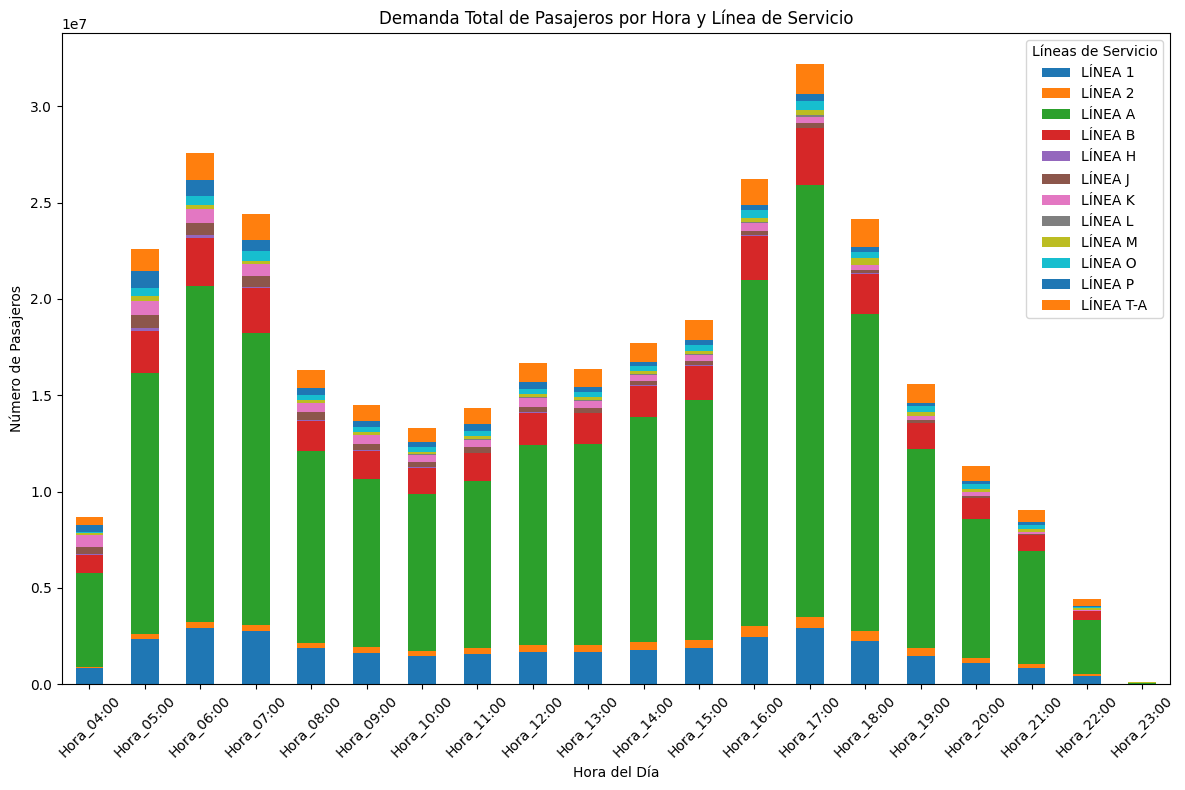

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de que tu dataframe esté cargado, por ejemplo:
# df_metro = pd.read_csv('tu_archivo.csv')

# Limpiar los datos para asegurar que los valores sean numéricos
df_metro_clean = df_metro.copy()

# Convertir las columnas de hora a tipo numérico, reemplazando los valores 'NaN' o no numéricos
cols = [f'Hora_{i:02d}:00' for i in range(4, 24)]  # Lista de columnas con datos de hora
df_metro_clean[cols] = df_metro_clean[cols].apply(pd.to_numeric, errors='coerce')

# Crear una nueva columna para la demanda total por línea y día
df_metro_clean['Total_Pasajeros'] = df_metro_clean[cols].sum(axis=1)

# Agrupar los datos por "Línea de Servicio" para ver la demanda por línea
df_demanda = df_metro_clean.groupby('Línea de Servicio')[cols].sum()

# Crear la tabla de resumen mostrando el número total de pasajeros por hora y línea
print(df_demanda)

# Visualización: Crear un gráfico de barras apiladas para ver la demanda total por hora
df_demanda.T.plot(kind='bar', stacked=True, figsize=(12, 8))

# Personalización de la gráfica
plt.title('Demanda Total de Pasajeros por Hora y Línea de Servicio')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Pasajeros')
plt.xticks(rotation=45)
plt.legend(title="Líneas de Servicio")
plt.tight_layout()

# Mostrar la gráfica
plt.show()


In [ ]:
# Seleccionar solo las columnas numéricas
df_metro_numerico = df_metro.select_dtypes(include=['number'])

# Sumar las columnas numéricas por filas (por cada línea de servicio)
df_demanda_mensual = df_metro_numerico.sum(axis=1)

# Mostrar el resultado
print(df_demanda_mensual)

# Convertirlo en un DataFrame con una columna de "Demanda Mensual"
df_demanda_mensual = pd.DataFrame(df_demanda_mensual, columns=["Demanda Mensual"])

# Exportar a Excel
df_demanda_mensual.to_excel("demanda_mensual.xlsx", header=True)

# Ver la tabla resultante
print(df_demanda_mensual)


0         6024.0
1       315546.0
2        50514.0
3         1798.0
4        13058.0
          ...   
4288      4400.0
4289     15166.0
4290     14176.0
4291     26338.0
4292     70250.0
Length: 4293, dtype: float64
      Demanda Mensual
0              6024.0
1            315546.0
2             50514.0
3              1798.0
4             13058.0
...               ...
4288           4400.0
4289          15166.0
4290          14176.0
4291          26338.0
4292          70250.0

[4293 rows x 1 columns]


In [ ]:
# Asegurarnos de que solo se sumen las columnas numéricas (por horas)
df_metro_numerico = df_metro.select_dtypes(include=['float64', 'int64'])

# Sumar las columnas numéricas por cada línea de servicio
df_demanda_mensual = df_metro_numerico.sum(axis=1)

# Crear un DataFrame con la columna "Demanda Mensual"
df_demanda_mensual = pd.DataFrame(df_demanda_mensual, columns=['Demanda Mensual'])

# Mostrar las primeras filas para verificar el resultado
df_demanda_mensual.head()


,Demanda Mensual
0,6024.0
1,315546.0
2,50514.0
3,1798.0
4,13058.0


In [ ]:
df_demanda_mensual

,Demanda Mensual
0,6024.0
1,315546.0
2,50514.0
3,1798.0
4,13058.0
...,...
4288,4400.0
4289,15166.0
4290,14176.0
4291,26338.0


In [ ]:
df_metro

,Día,Línea de Servicio,Hora_04:00,Hora_05:00,Hora_06:00,Hora_07:00,Hora_08:00,Hora_09:00,Hora_10:00,Hora_11:00,...,Hora_15:00,Hora_16:00,Hora_17:00,Hora_18:00,Hora_19:00,Hora_20:00,Hora_21:00,Hora_22:00,Hora_23:00,Total_Pasajeros
0,2024-01-01,LÍNEA 2,1.0,149.0,143.0,74.0,100.0,135.0,116.0,225.0,...,188.0,277.0,291.0,284.0,212.0,152.0,100.0,9.0,NaN,3012.0
1,2024-01-01,LÍNEA A,1460.0,5488.0,5769.0,4752.0,3993.0,4512.0,5551.0,7197.0,...,10666.0,12998.0,15376.0,16932.0,14537.0,11750.0,7729.0,664.0,NaN,157773.0
2,2024-01-01,LÍNEA B,231.0,718.0,826.0,672.0,641.0,818.0,1060.0,1398.0,...,1956.0,2228.0,2587.0,2749.0,2043.0,1302.0,893.0,85.0,NaN,25257.0
3,2024-01-01,LÍNEA H,NaN,NaN,NaN,NaN,NaN,50.0,62.0,71.0,...,72.0,93.0,83.0,113.0,80.0,39.0,25.0,4.0,NaN,899.0
4,2024-01-01,LÍNEA J,NaN,NaN,NaN,NaN,39.0,368.0,401.0,381.0,...,551.0,619.0,726.0,906.0,542.0,356.0,140.0,3.0,NaN,6529.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4288,2024-12-31,LÍNEA L,NaN,NaN,NaN,NaN,1.0,114.0,154.0,322.0,...,268.0,122.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,2200.0
4289,2024-12-31,LÍNEA M,138.0,306.0,390.0,404.0,308.0,305.0,322.0,344.0,...,559.0,550.0,540.0,668.0,518.0,473.0,313.0,79.0,NaN,7583.0
4290,2024-12-31,LÍNEA O,189.0,483.0,516.0,483.0,424.0,377.0,301.0,331.0,...,406.0,457.0,535.0,522.0,403.0,233.0,115.0,20.0,NaN,7088.0
4291,2024-12-31,LÍNEA P,447.0,885.0,1035.0,1097.0,872.0,753.0,791.0,853.0,...,583.0,711.0,632.0,599.0,657.0,613.0,461.0,8.0,NaN,13169.0


In [ ]:
df_encicla = pd.read_csv('/content/EstacionesEnCicla_DatosAbiertos2_1.csv', encoding='utf-8-sig', sep=';')

In [ ]:
df_encicla

,#,NOMBRE ESTACION,DIRECCION,REFERENCIA DE UBICACION,MUNICIPIO,TIPO,TOTAL ANCLAJES,COORDENADAS
0,1,Moravia,CALLE 82A # 52-29,Frente a la entrada principal del Centro de De...,Zona 1 - Nororiental,MANUAL,15,"6,27658;-75,5648"
1,2,Universidad,CALLE 73 # 52-2,Bajo el viaducto de la estación Universidad de...,Zona 1 - Nororiental,MANUAL,33,"6,26939;-75,56577"
2,3,Ruta N,CARRERA 52 # 67A-13,Frente a la fachada principal de Ruta N sobre ...,Zona 1 - Nororiental,AUTOM.,40,"6,26518;-75,56634"
3,4,Robledo,CARRERA 77A # 63 - 100,Diagonal al Colegio Mayor de Antioquia,Zona 2 - Noroccidental,MANUAL,21,"6,27197;-75,59131"
4,5,Campus Nacional,CALLE 59A # 64C - 44,Portería de la Iguaná con Carrera 65 de la Uni...,Zona 2 - Noroccidental,MANUAL,33,"6,25971;-75,579"
...,...,...,...,...,...,...,...,...
104,105,Puente pan de Queso II,CARRERA 42 - CALLE 60 SUR,Autopista sur. Salida Sur Occidente de la esta...,Itagui,AUTOM.,40,"6,1744;-75,59855"
105,106,Metro Bello,CARRERA 46 # 45B - 55,Paradero de buses del Metro. Coliseo Mancheste...,Bello,MANUAL,15,"6,33216;-75,55374"
106,107,Parque Bello,CALLE 50A # 50 - 32,Esquina Suroriental del Parque. Frente a la ca...,Bello,MANUAL,15,"6,33462;-75,5585"
107,108,Paraná,CARRERA 52D 75 AB SUR 80,Frente al conjunto residencial Paraná. A media...,La Estrella,MANUAL,20,"6,16007;-75,62836"


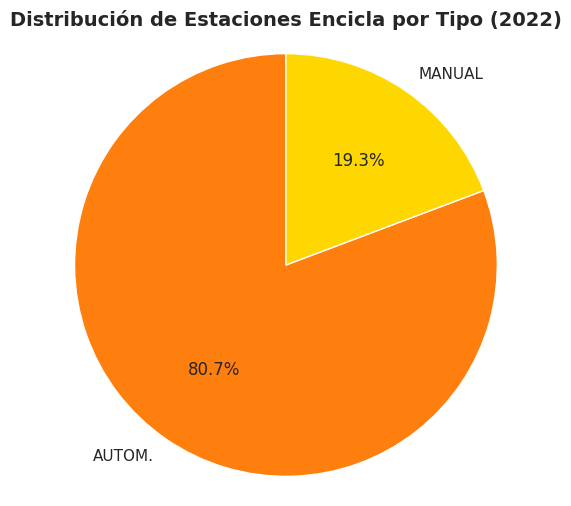

In [ ]:
import matplotlib.pyplot as plt

# Supongamos que df_tipo ya está preparado
colores = ['#FF7F0E', '#FFD700']  # naranja tab:orange y amarillo dorado

plt.figure(figsize=(6,6))
plt.pie(
    df_tipo['Número de estaciones'],
    labels=df_tipo['TIPO'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colores
)
plt.title('Distribución de Estaciones Encicla por Tipo (2022)', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()
